<a href="https://colab.research.google.com/github/albertopolini/DSIM/blob/main/EDSIM6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer learning

In [3]:
from tensorflow import keras
import tarfile
from shutil import copyfile

In [4]:
copyfile('/content/drive/MyDrive/101_ObjectCategories_split.tar', '101_ObjectCategories_split.tar')

'101_ObjectCategories_split.tar'

In [5]:
tar = tarfile.open('101_ObjectCategories_split.tar')
tar.extractall()
tar.close()

## Data loader

In [10]:
batch_size = 32

In [6]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    directory = '101_ObjectCategories_split/train',
    image_size = (224,224),
    color_mode = 'rgb',
    batch_size = batch_size,
    label_mode= 'categorical',
    shuffle = True,
    seed=1
)

Found 4600 files belonging to 102 classes.


In [7]:
train_dataset

<BatchDataset shapes: ((None, 224, 224, 3), (None, 102)), types: (tf.float32, tf.float32)>

In [9]:
test_dataset = keras.preprocessing.image_dataset_from_directory(
    directory = '101_ObjectCategories_split/test',
    image_size = (224,224),
    color_mode = 'rgb',
    batch_size = batch_size,
    label_mode= 'categorical',
    shuffle = True,
    seed=1
)

Found 4544 files belonging to 102 classes.


## Importing a pre trained network

We are importing the mobile net v2 model with the pre trained weights from imagenet

In [11]:
base_net = keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    pooling="avg",
  )

9420800/9406464 [==============================] - 0s 0us/step


In [13]:
len(base_net.layers)

155

In [14]:
base_net.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

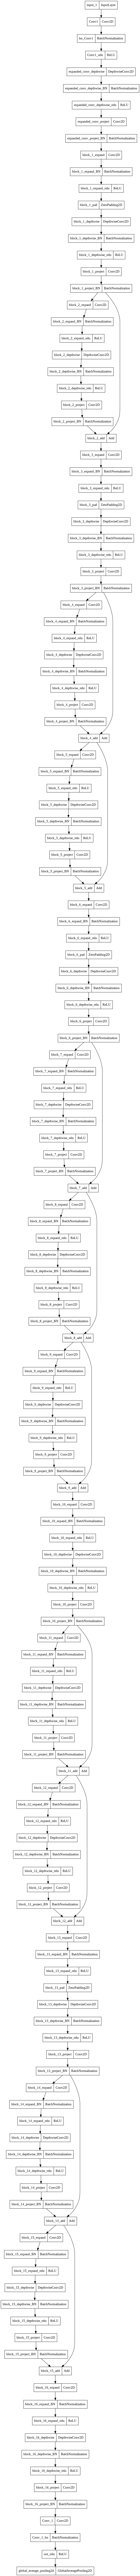

In [16]:
keras.utils.plot_model(base_net)

## Model specialization

In [17]:
# Freezing all the layers in base_net

for layer in base_net.layers:
  layer.trainable = False

In [24]:
inputs = keras.Input(shape=(224,224,3))

x = inputs

# Put here data augmentation

#Preprocessing
x = keras.applications.mobilenet_v2.preprocess_input(x)

# application of base_net
x = base_net(x)

# Additional layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(102, activation='softmax')(x)

outputs = x

In [25]:
net = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_2 (Dense)             (None, 1024)              1311744   
                                                           

In [27]:
net.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
epochs = 10
history = net.fit(train_dataset, epochs=epochs)

Epoch 1/10
144/144 [==============================] - 18s 95ms/step - loss: 1.1476 - accuracy: 0.7446
Epoch 2/10
144/144 [==============================] - 14s 94ms/step - loss: 0.1991 - accuracy: 0.9393
Epoch 3/10
144/144 [==============================] - 14s 95ms/step - loss: 0.1109 - accuracy: 0.9693
Epoch 4/10
144/144 [==============================] - 14s 95ms/step - loss: 0.0679 - accuracy: 0.9839
Epoch 5/10
144/144 [==============================] - 14s 95ms/step - loss: 0.0565 - accuracy: 0.9865
Epoch 6/10
144/144 [==============================] - 14s 94ms/step - loss: 0.0465 - accuracy: 0.9917
Epoch 7/10
144/144 [==============================] - 14s 95ms/step - loss: 0.0515 - accuracy: 0.9880
Epoch 8/10
144/144 [==============================] - 14s 94ms/step - loss: 0.0330 - accuracy: 0.9909
Epoch 9/10
144/144 [==============================] - 14s 95ms/step - loss: 0.0275 - accuracy: 0.9948
Epoch 10/10
144/144 [==============================] - 14s 96ms/step - loss: 0.031

In [29]:
net.evaluate(test_dataset)

142/142 [==============================] - 15s 94ms/step - loss: 0.5166 - accuracy: 0.9217


[0.5165770053863525, 0.9216549396514893]

## Saving the model

In [30]:
net.save('mymodel_101.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [31]:
net = None

In [33]:
net = keras.models.load_model('mymodel_101.h5')

In [34]:
net

# Assignment

**Train a network with transfer learning**
* Task: 101 object categories
* Architecture: No mobile net

* Try to use data augmentation

In [72]:
# Pre-trained network: InceptionV3

inception = keras.applications.InceptionV3(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    pooling='avg',
)

87924736/87910968 [==============================] - 1s 0us/step


In [73]:
# The model has 191 layers
len(inception.layers)

312

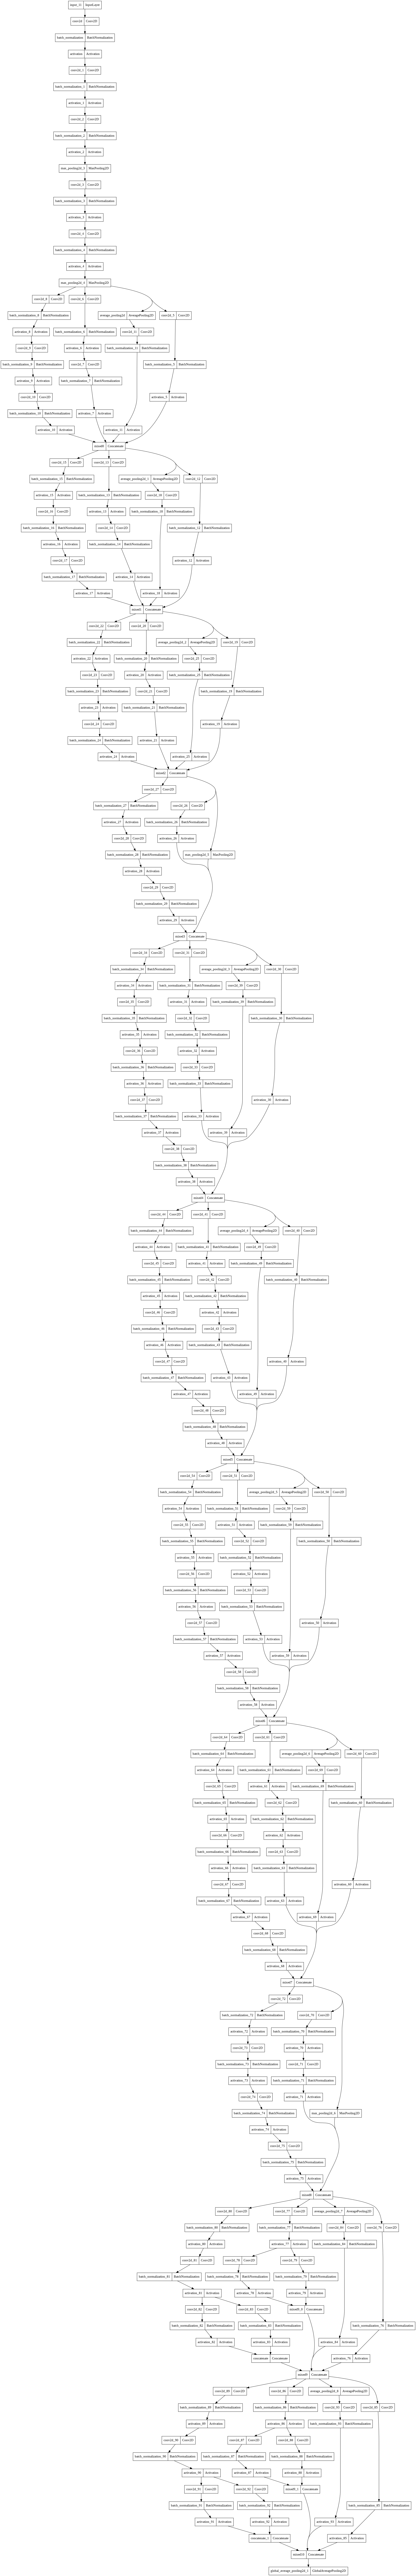

In [74]:
keras.utils.plot_model(inception)

In [75]:
for layer in inception.layers:
  layer.trainable = False

In [81]:
# Creating the model to append at the end of the resnet

inputs = keras.layers.Input((224,224,3))

x = inputs

x = keras.layers.RandomFlip(mode='horizontal', seed=123)(x)
x = keras.layers.RandomZoom(height_factor=(0.1,0.2), width_factor=(0.1,0.2), seed=123)(x)
x = keras.layers.RandomContrast(factor=(0.1,0.1), seed=123)(x)

#Preprocessing
x = keras.applications.inception_v3.preprocess_input(x)

# application of base_net
x = inception(x)

# Additional layers
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(102, activation='softmax')(x)

outputs = x

In [82]:
network = keras.Model(inputs, outputs)

In [83]:
network.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 random_flip_5 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_5 (RandomCo  (None, 224, 224, 3)      0         
 ntrast)                                                         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 224, 224, 3)      0   

In [84]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 5
history = network.fit(train_dataset, epochs=epochs, validation_data=test_dataset)